In [1]:
from fragRebSim import integrator

Nstars = 10
Nfrag = 50
s = integrator.RebSimIntegrator(Nstars, Nfrag)

s.sim_integrate()

('Masses:', [0.3316835352452448, 0.24458491469869045, 0.1147848891178224, 0.10544223762949272, 0.2950395783273925, 0.12389048773530913, 0.2818585590159312, 0.10091511291221056, 0.30418712360626643, 0.11951989527376702])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

times = [point[0] for point in s.forces]
# vels = [np.linalg.norm(point[3]) for point in s.forces]
# v = [vel - vels[0] for vel in vels]
# plt.plot([np.log10(t) for t in times], vels)
# plt.show
cluster_norm = [np.linalg.norm(point[1][0]) for point in s.forces]
bulge_norm = [np.linalg.norm(point[1][1]) for point in s.forces]
print len(times)==len(bulge_norm)
disk_norm = [np.linalg.norm(point[1][2]) for point in s.forces]
halo_norm = [np.linalg.norm(point[1][3]) for point in s.forces]
bh_norm = [np.linalg.norm(point[1][4]) for point in s.forces]
# accel_norm = [np.linalg.norm(point[4]) for point in s.forces]

# print bh_norm

cluster,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in cluster_norm], label = 'cluster')
bulge,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in bulge_norm], label = 'bulge')
disk,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in disk_norm], label = 'disk')
halo,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in halo_norm], label = 'halo')
bh,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in bh_norm], label = 'BH')
# accel,= plt.plot([np.log10(t) for t in times], [np.log10(b) for b in accel_norm], label = 'accelerations')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
# plt.legend(handles=[cluster, bulge, disk, halo, bh, accel])
plt.show

<IPython.core.display.Javascript object>


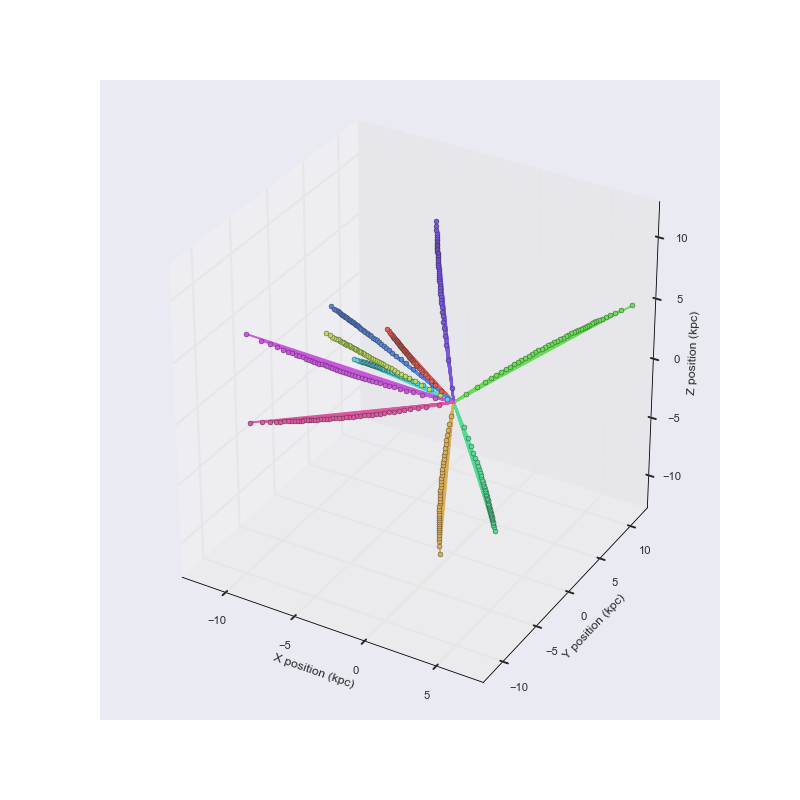

('Plotted fragments: ', 473)


In [4]:
#For Jupyter/IPython notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.display import display, clear_output
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(color_codes=True)

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')
colors = sns.color_palette("hls", Nstars).as_hex()
plotted_frag = 0

for star in range(s.Nstars):
    for i in range(s.Nfrag):
        if len(s.posx[star][i]) < s.Nout:
            continue
        ax2.plot(s.posx[star][i],s.posy[star][i],s.posz[star][i], c = colors[star]);
        ax2.scatter([s.posx[star][i][-1]],[s.posy[star][i][-1]],[s.posz[star][i][-1]],\
                    c = colors[star]);
        plotted_frag += 1
        
# for star in range(s.Nstars):
#     for i in range(s.Nfrag):
#         if len(s.posx[star][i]) < s.Nout:
#             continue
#         ax2.plot([0.0, s.posx[star][i][0]],[0.0, s.posy[star][i][0]],\
#                  [0.0, s.posz[star][i][0]], c = colors[star]);

ax2.set_xlabel('X position (kpc)')
ax2.set_ylabel('Y position (kpc)')
ax2.set_zlabel('Z position (kpc)')

print('Plotted fragments: ', plotted_frag)
# box_size = 1
# ax2.set_xlim(-box_size,box_size)
# ax2.set_ylim(-box_size,box_size)
# ax2.set_zlim(-box_size,box_size)

<IPython.core.display.Javascript object>


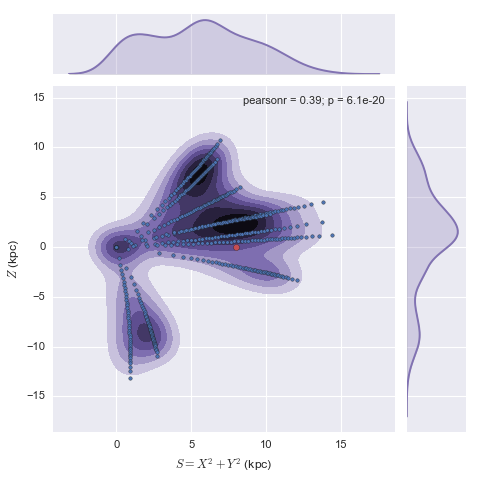

In [3]:
from math import sqrt
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd

data = []

for star in range(s.Nstars):
    for i in range(s.Nfrag):
        point = [sqrt(s.posx[star][i][-1]**2 + s.posy[star][i][-1]**2), s.posz[star][i][-1]]
        data.append(point)
        
fragdata = np.array([point for point in data])
df = pd.DataFrame(fragdata, columns=["s", "z"])

sun_pos = pd.DataFrame([[8,0]], columns=['s', 'z'])

#Density plot - S and Z
g = sns.jointplot(x="s", y="z", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="b", s=10, marker="o")
g.x = sun_pos.s
g.y = sun_pos.z
g.plot_joint(plt.scatter, c="r", s=30, marker="o")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$S = X^2 + Y^2$ (kpc)", "$Z$ (kpc)");